In [1]:
# import pysam
# import os
# import re
# from collections import Counter

import seaborn as sns
import pandas as pd
import glob
from matplotlib import pyplot as plt

from count_reads import *

directory = '/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam'

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Family 1 (MH0-)

In [2]:
fam1_folders = [x[0] for x in os.walk(os.path.join(directory, 'fam1'))]
fam1_files = []
for folder in fam1_folders:
    if not folder == os.path.join(directory, 'fam1'):
        fam1_files.append(glob.glob(os.path.join(folder, '*primary.bam'))[0])
fam1_files

['/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143013/MH0143013.final.filtered.primary.bam',
 '/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143018/MH0143018.final.filtered.primary.bam',
 '/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143008/MH0143008.final.filtered.primary.bam',
 '/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143009/MH0143009.final.filtered.primary.bam',
 '/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143019/MH0143019.final.filtered.primary.bam']

## Unmapped reads plot

### All reads

In [3]:
%%time
# family 1 cram files
fam1_files = glob.glob(os.path.join(directory, 'fam1/*.cram'))

# use dictionary to store unmapped read counts for each alignment file
fam1_unmapped_dict = dict()

print('Start counting unmapped reads for {} alignment files...'.format(len(fam1_files)))
for file in fam1_files:
    print('Processing file ' + file)
    fam1_ref, unmapped_r2, unmapped_r1 = count_unmapped_reads(file)
    unmapped_all = []
    for i, j in zip(unmapped_r1, unmapped_r2):
        unmapped_all.append(i+j)
    fam1_unmapped_dict[file] = unmapped_all.copy()

Finished counting unmapped reads for /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143018.final.cram
Finished counting unmapped reads for /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143013.final.cram
Finished counting unmapped reads for /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143019.final.cram
Finished counting unmapped reads for /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143009.final.cram
Finished counting unmapped reads for /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143008.final.cram


Populating the interactive namespace from numpy and matplotlib


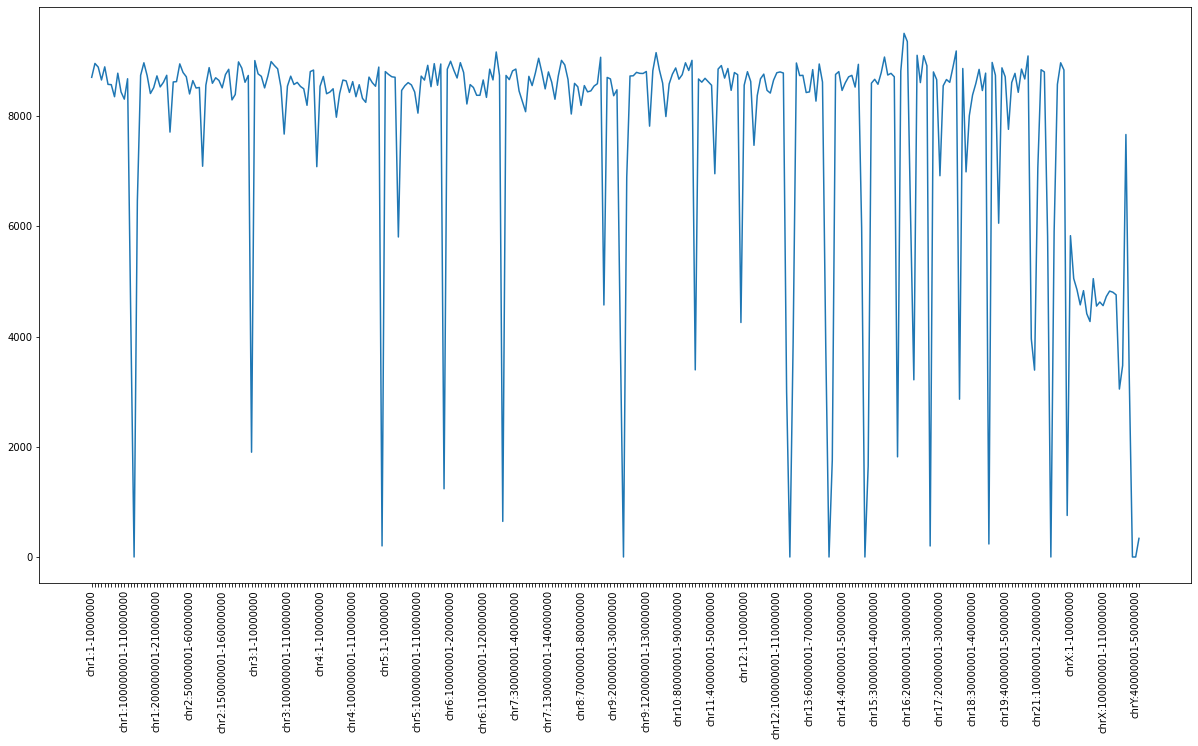

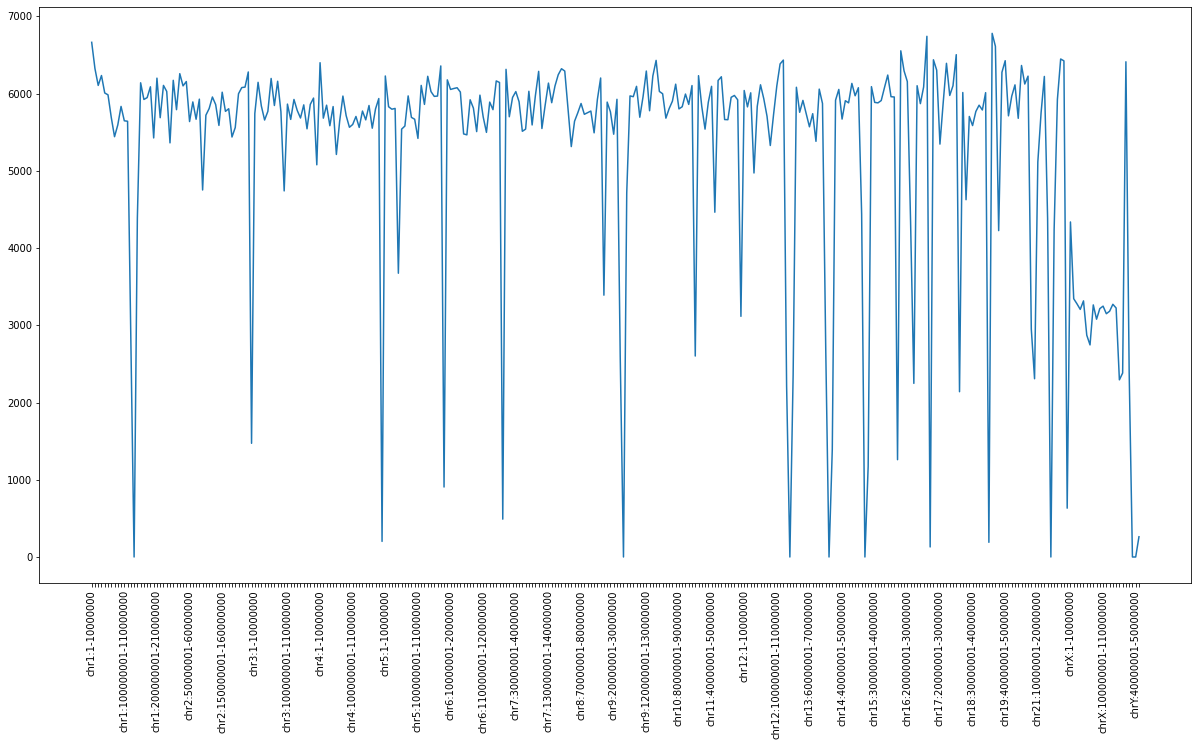

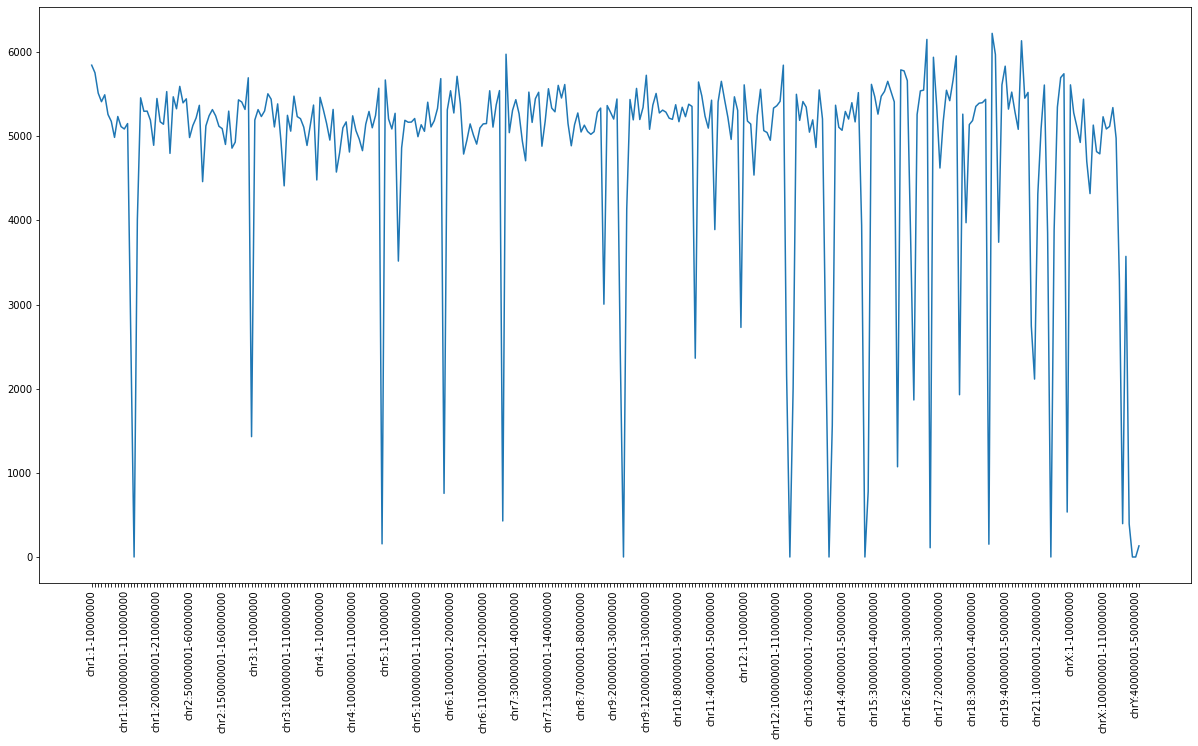

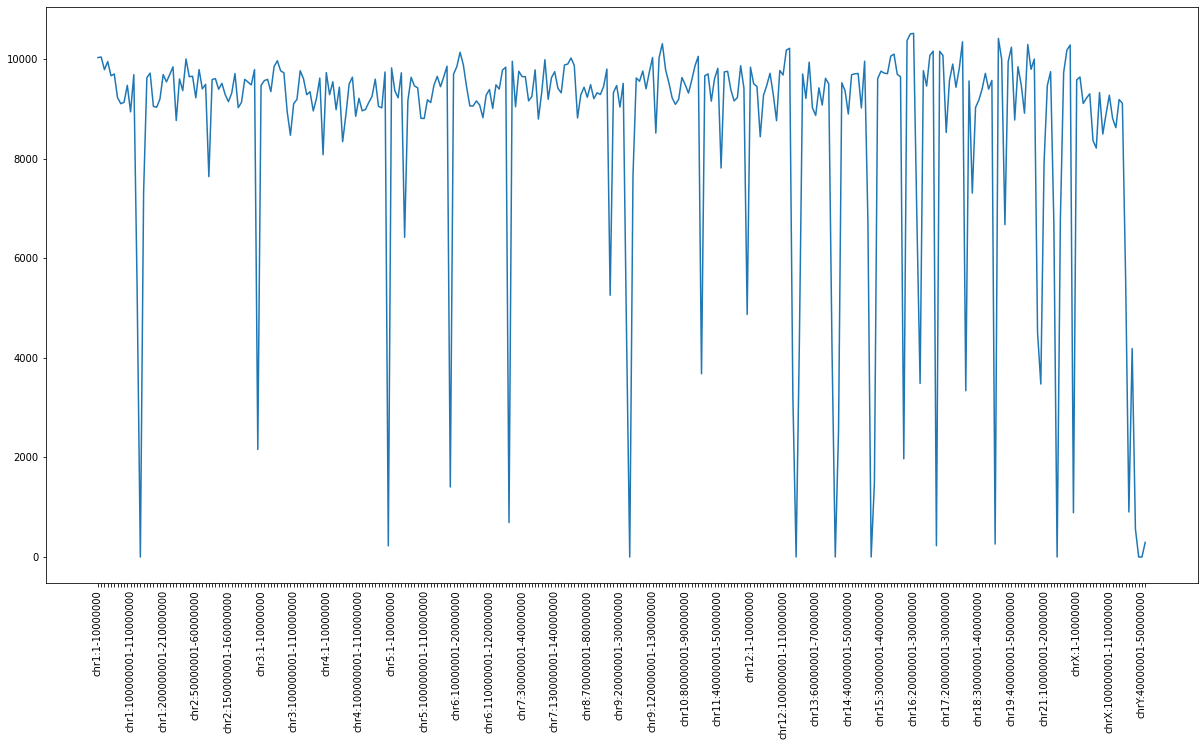

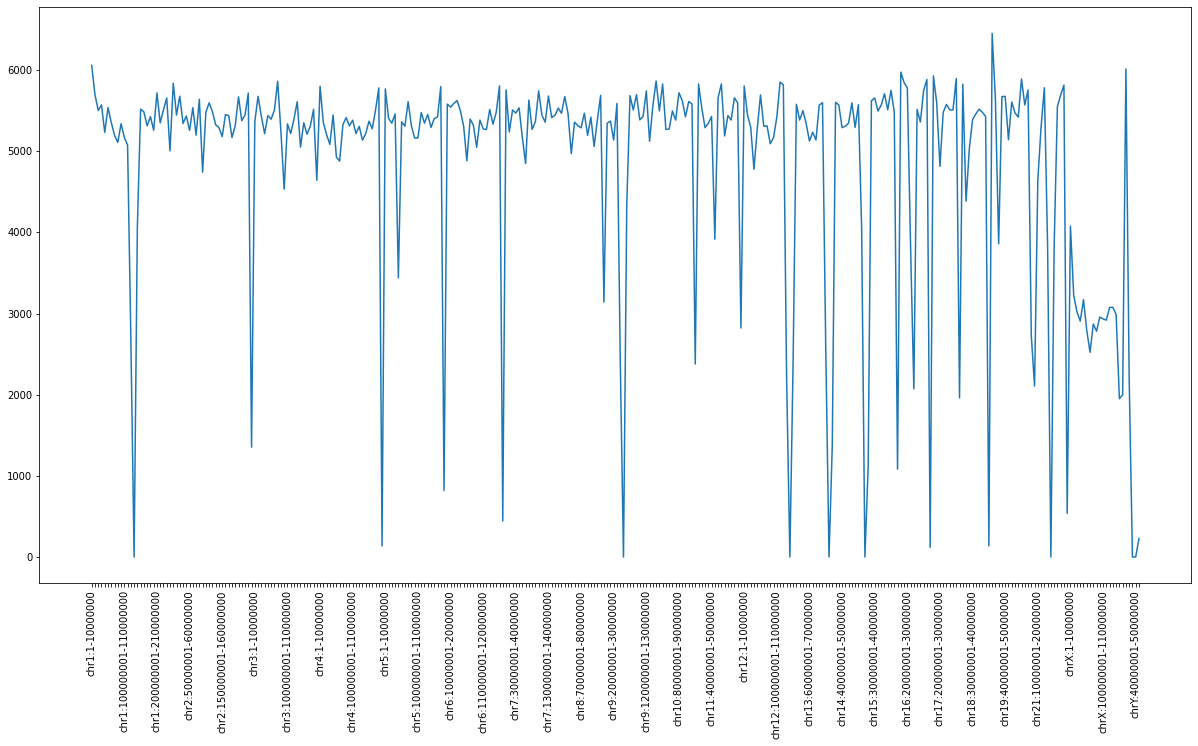

In [5]:
for file in fam1_files:
    fig= plt.figure(figsize=(20,10))
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    plt.plot(fam1_unmapped_dict[file])

    every_nth = 10
    plt.xticks(range(len(fam1_unmapped_dict[file])), fam1_ref, size='medium', rotation='vertical')
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)

### Primary reads only (excluding supplementary/secondary/duplicate reads)

In [3]:
%%time
# family 1 filtered bam files
fam1_files = glob.glob(os.path.join(directory, 'fam1/*.primary.bam'))

# use dictionary to store unmapped read counts for each alignment file
fam1_unmapped_dict = dict()

print('Start counting unmapped reads for {} alignment files...'.format(len(fam1_files)))
for file in fam1_files:
    print('Processing file ' + file)
    fam1_ref, unmapped_r2, unmapped_r1 = count_unmapped_reads(file)
    unmapped_all = []
    for i, j in zip(unmapped_r1, unmapped_r2):
        unmapped_all.append(i+j)
    fam1_unmapped_dict[file] = unmapped_all.copy()

Start counting unpaired reads for 5 alignment files...
Processing file /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143013.final.filtered.primary.bam
Finished counting unmapped reads for /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143013.final.filtered.primary.bam
Processing file /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143009.final.filtered.primary.bam
Finished counting unmapped reads for /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143009.final.filtered.primary.bam
Processing file /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143019.final.filtered.primary.bam
Finished counting unmapped reads for /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143019.final.filtered.primary.bam
Processing file /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143018.final.filtered.primary.bam
Finished counting unmapped reads for /scratch/groups/dpwall/per

Populating the interactive namespace from numpy and matplotlib


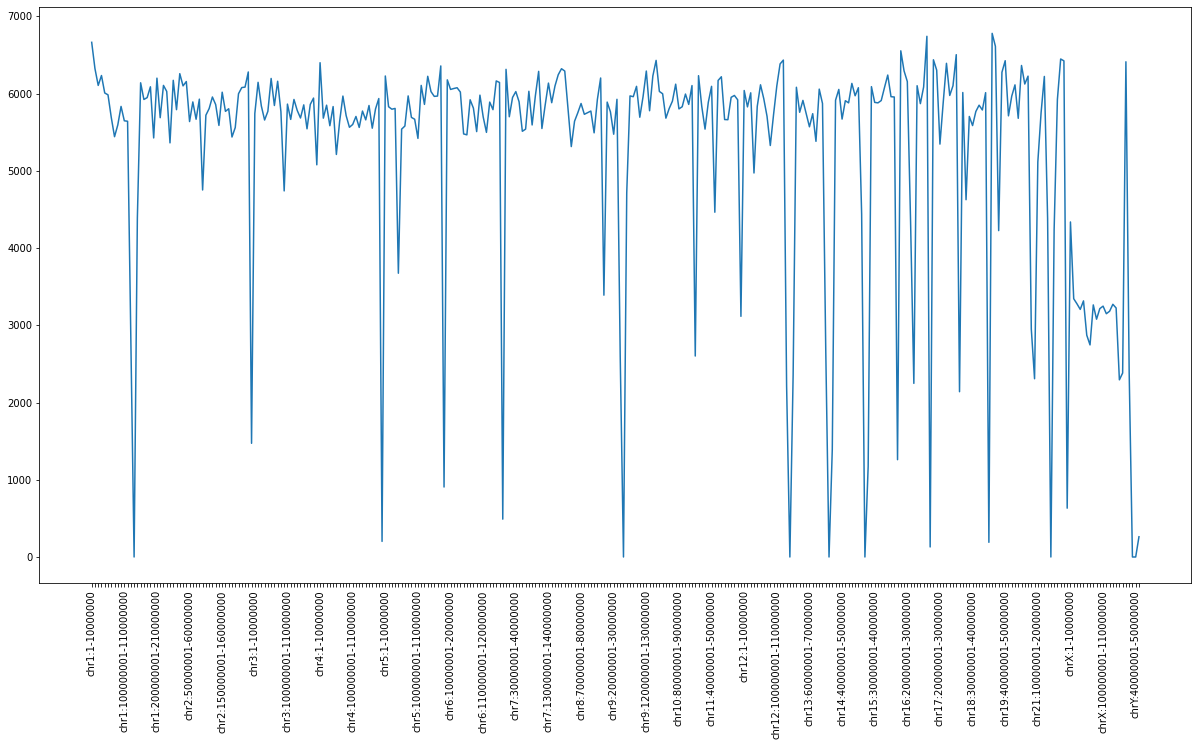

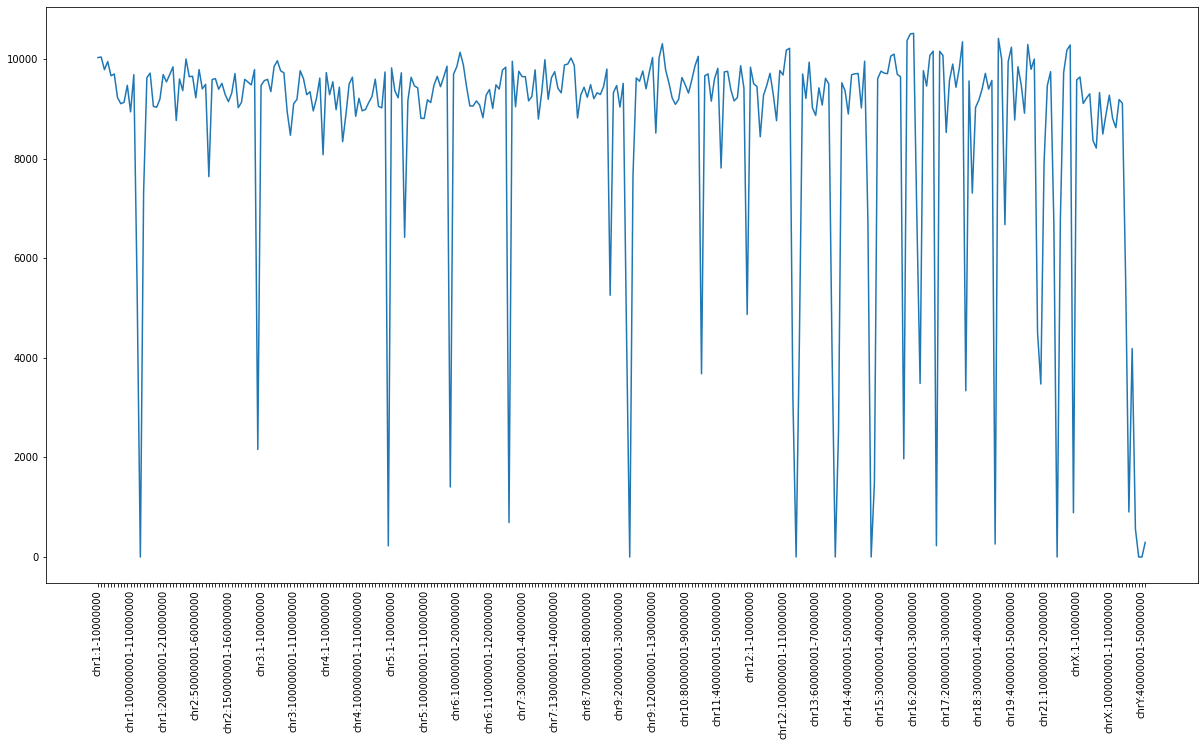

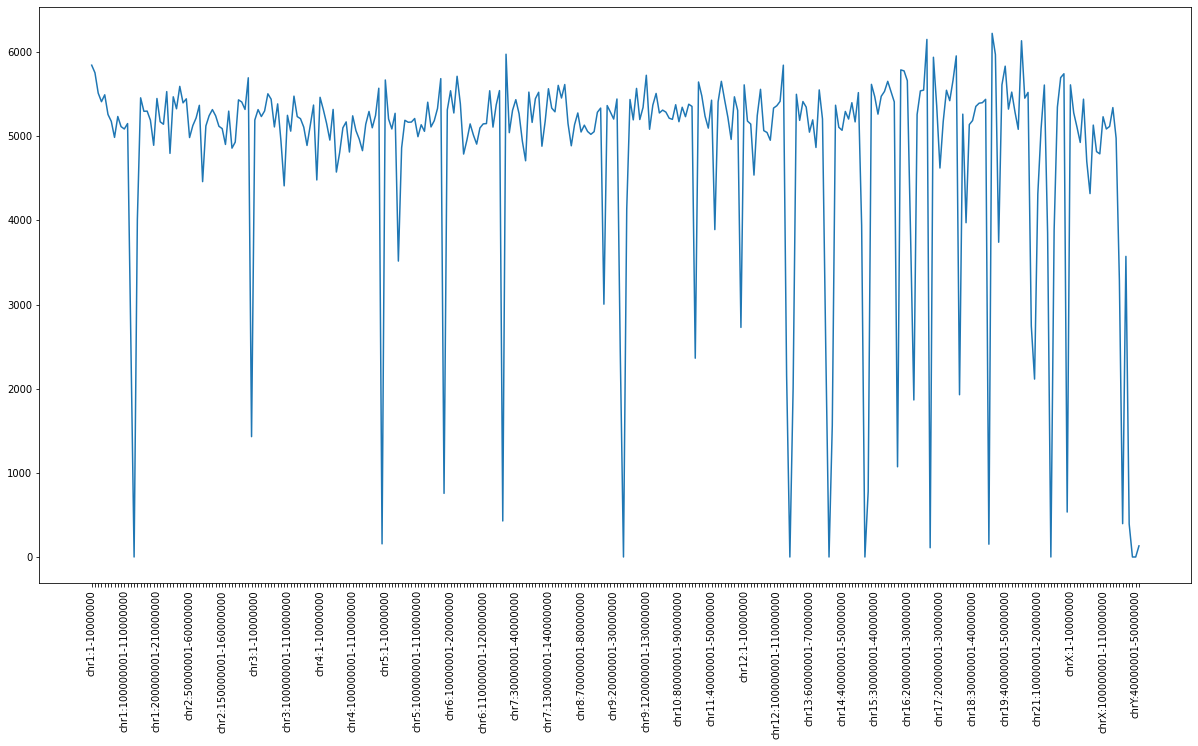

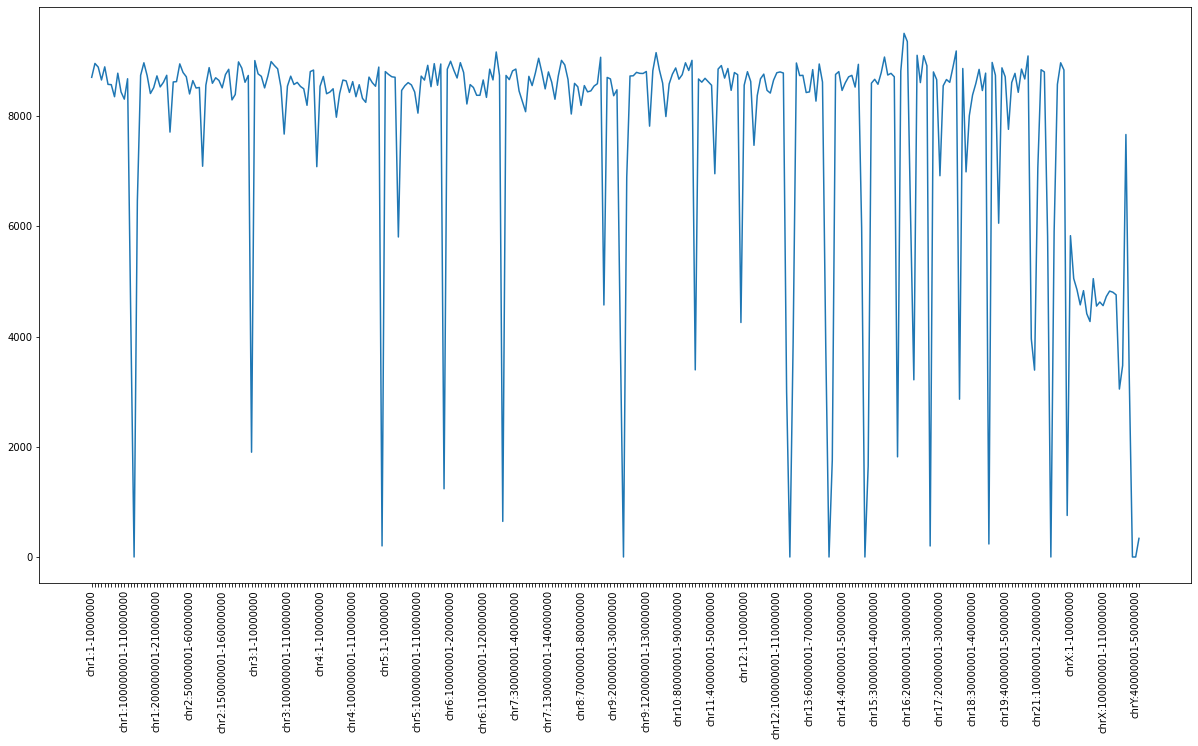

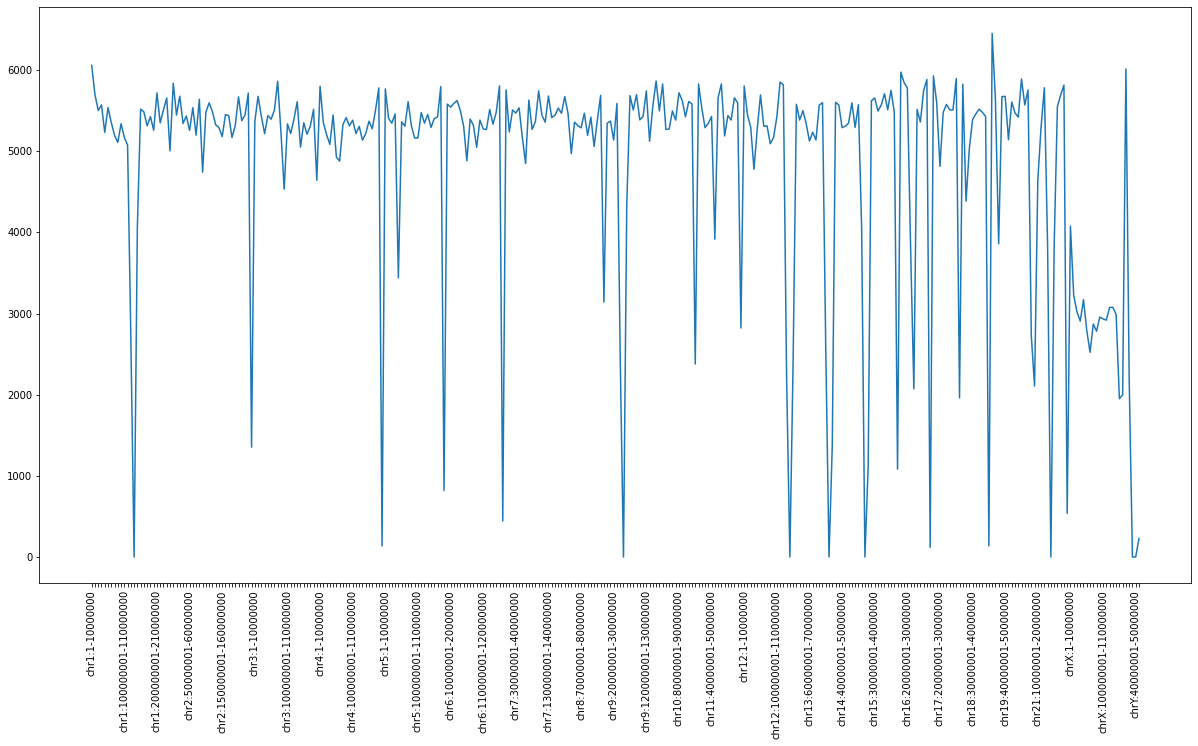

In [10]:
for file in fam1_files:
    fig= plt.figure(figsize=(20,10))
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    plt.plot(fam1_unmapped_dict[file])

    every_nth = 10
    plt.xticks(range(len(fam1_unmapped_dict[file])), fam1_ref, size='medium', rotation='vertical')
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)

To double check these counts against samtools flagstat, get the # of unmapped reads for one randomly selected sample 

In [18]:
print(fam1_unmapped_dict.keys())
print(sum(fam1_unmapped_dict['/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143008.final.filtered.primary.bam']))

dict_keys(['/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143013.final.filtered.primary.bam', '/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143009.final.filtered.primary.bam', '/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143019.final.filtered.primary.bam', '/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143018.final.filtered.primary.bam', '/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143008.final.filtered.primary.bam'])
1559402


In [3]:
%%time

print('Processing file ' + fam1_files[2])
fam1_ref, unmapped_r2, unmapped_r1 = count_unmapped_reads(fam1_files[2], chromosomal=False)

Processing file /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143008/MH0143008.final.filtered.primary.bam
Finished counting unmapped reads for /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143008/MH0143008.final.filtered.primary.bam
CPU times: user 35min 34s, sys: 17.7 s, total: 35min 52s
Wall time: 35min 59s


**Expected counts:**  
UM = 786231  
MU = 786231

In [4]:
print(sum(unmapped_r2))
print(sum(unmapped_r1))

786245
786188


## Heatmap of improperly paired reads

In [3]:
%%time
fam1_improper_dict = dict()

print('Start counting improperly paired reads for {} alignment files...'.format(len(fam1_files)))
for file in fam1_files:
    print('Processing file ' + file)
    improper_pairs = count_improper_pairs(file)
    df = pd.DataFrame.from_dict(improper_pairs)
    df.index = df.columns
    fam1_improper_dict[file] = df.copy()

Start counting improperly paired reads for 5 alignment files...
Processing file /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143013/MH0143013.final.filtered.primary.bam
Finished counting improper pairs for /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143013/MH0143013.final.filtered.primary.bam
Processing file /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143018/MH0143018.final.filtered.primary.bam
Finished counting improper pairs for /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143018/MH0143018.final.filtered.primary.bam
Processing file /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143008/MH0143008.final.filtered.primary.bam
Finished counting improper pairs for /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143008/MH0143008.final.filtered.primary.bam
Processing file /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam1/MH0143009/MH0143009.final.filte

In [14]:
max(fam1_improper_dict[fam1_files[0]].iloc[:43, :43])

'chrY,1,57227415'

MH0143013.final.filtered.primary.bam


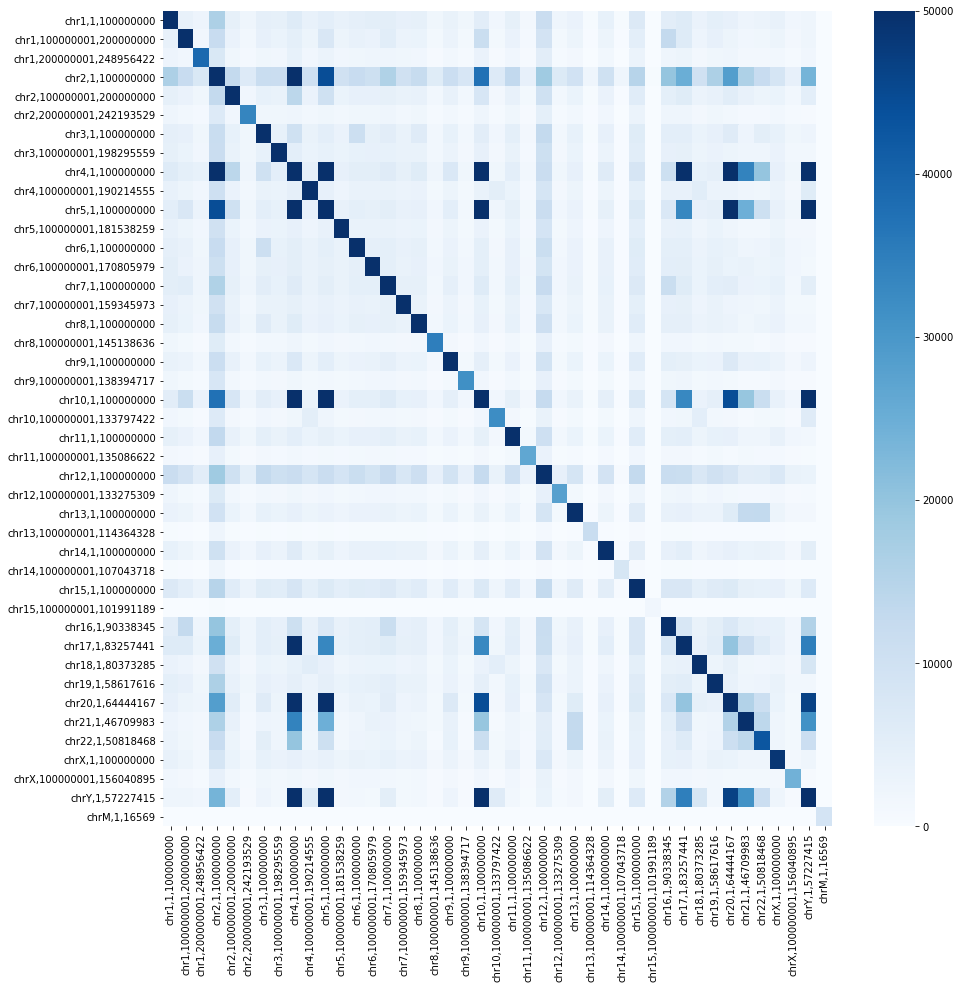

MH0143018.final.filtered.primary.bam


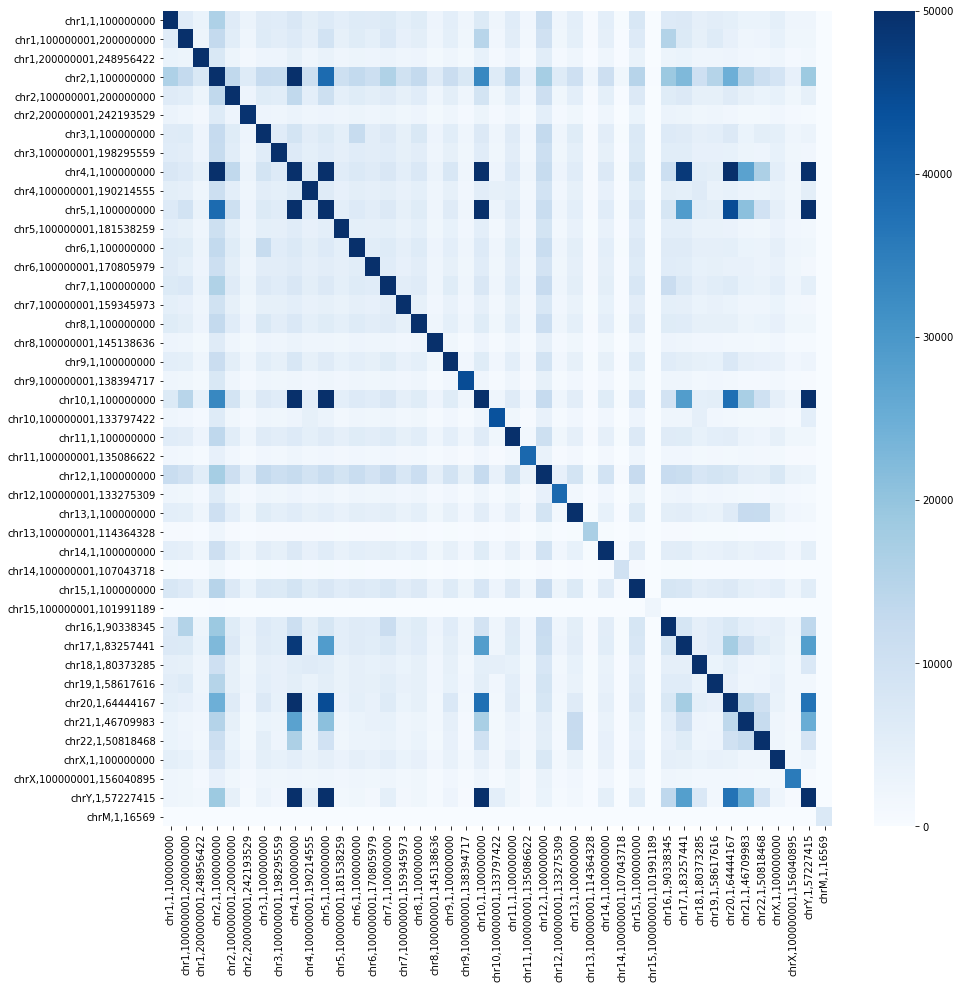

MH0143008.final.filtered.primary.bam


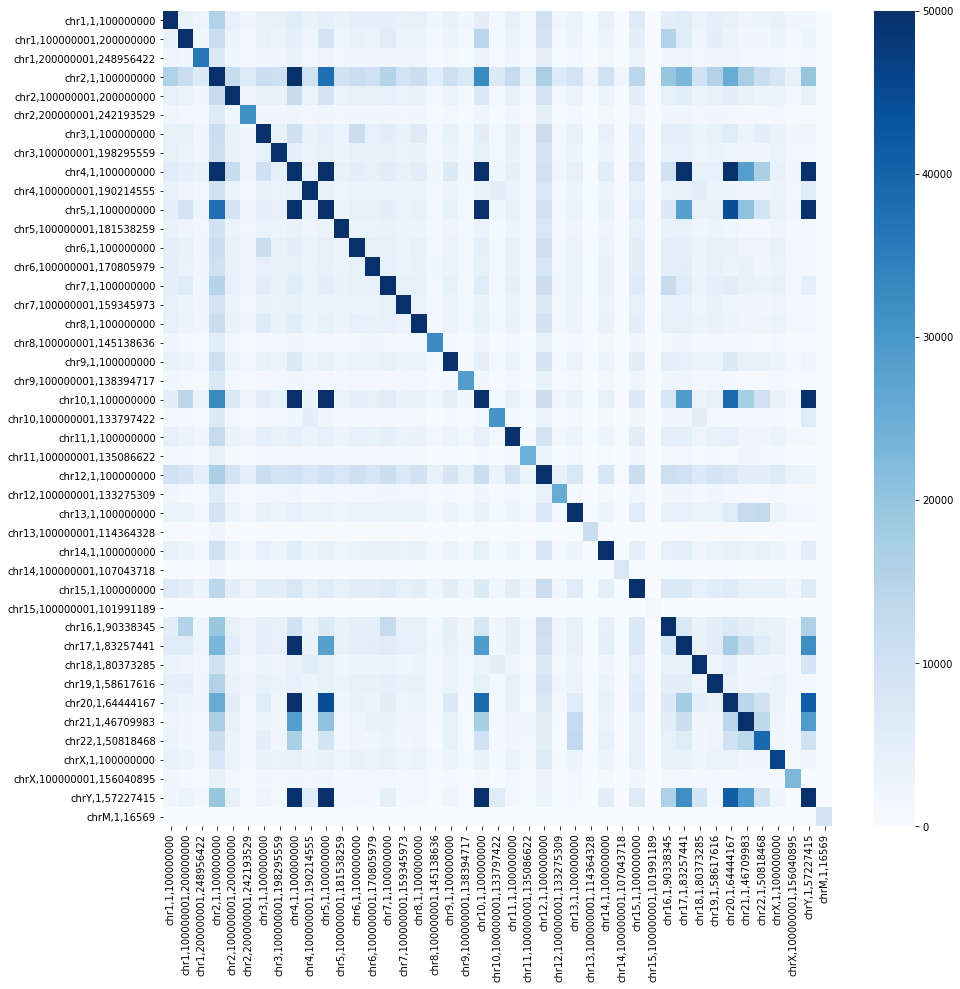

MH0143009.final.filtered.primary.bam


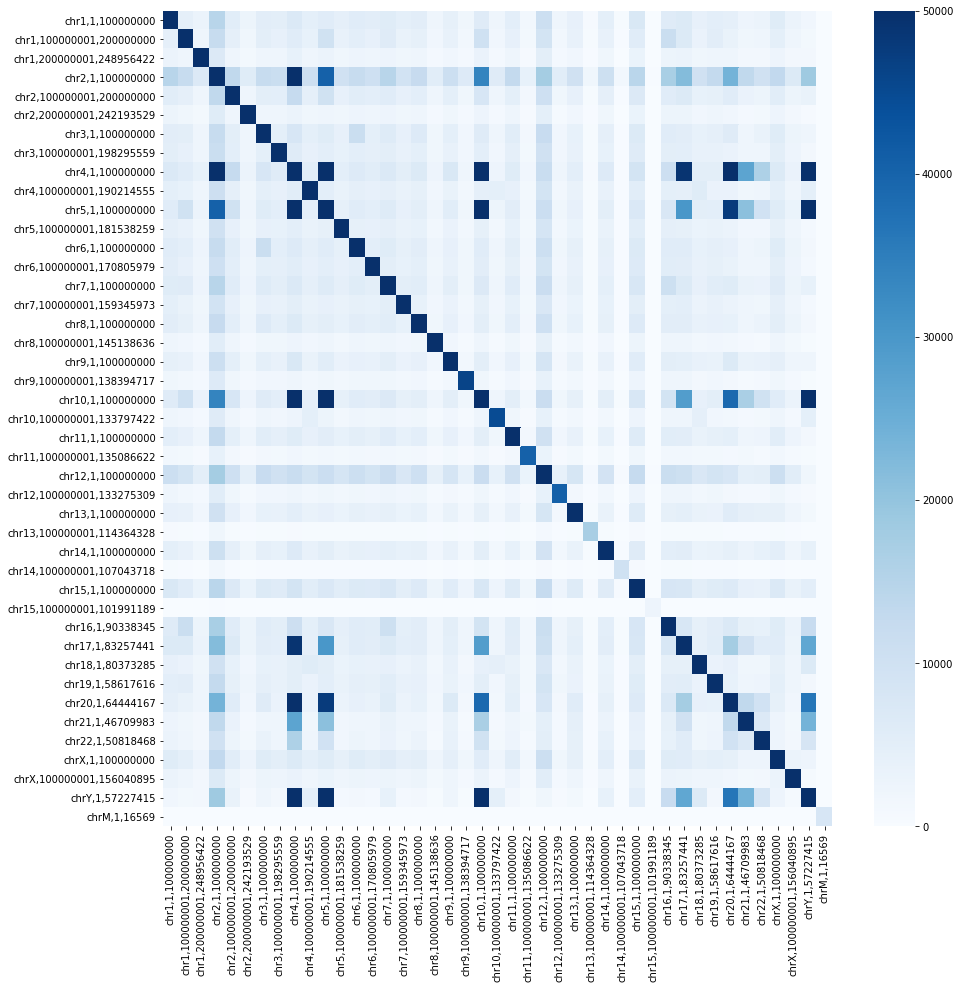

MH0143019.final.filtered.primary.bam


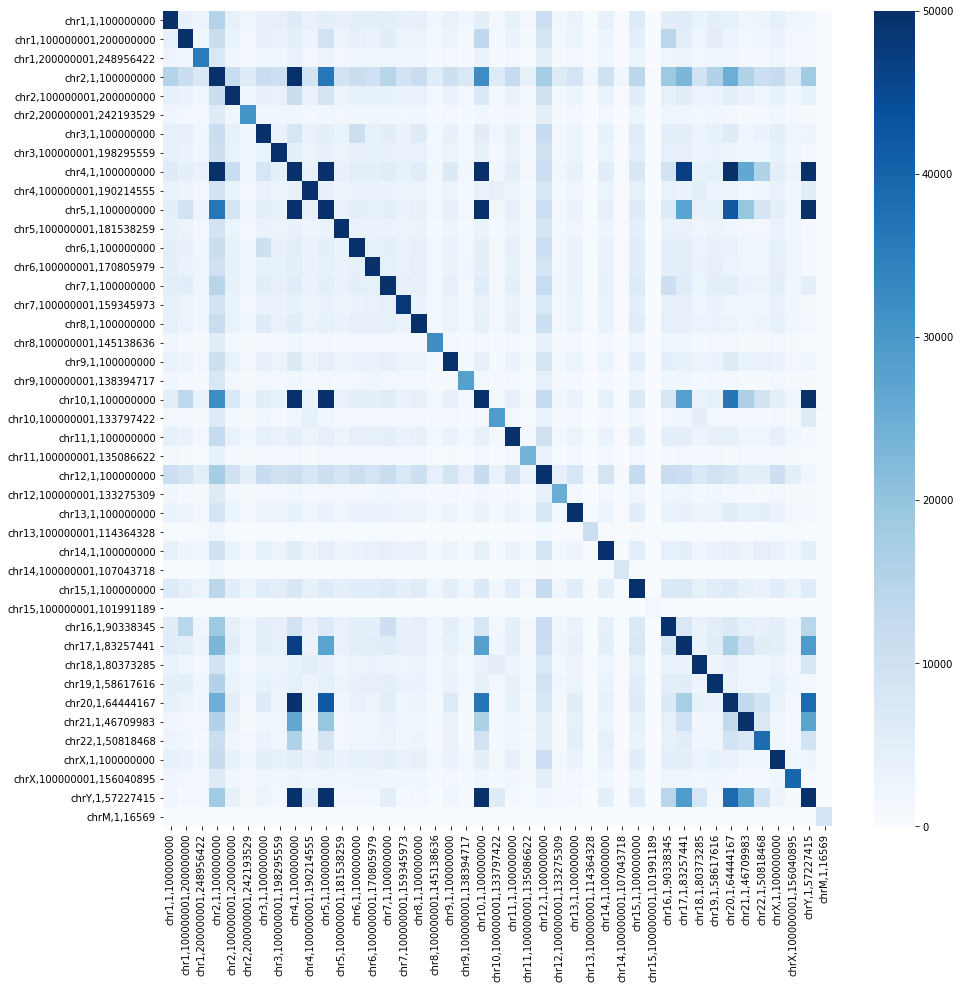

In [20]:
for file in fam1_files:
    print(os.path.basename(file))
    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(fam1_improper_dict[file].iloc[:43, :43], cmap="Blues", vmin=0, vmax=50000, ax=ax)
    plt.show()

# Family 2 (02C-)

## Unmapped reads plot

### All reads

In [7]:
%%time
# family 2 cram files
fam2_files = glob.glob(os.path.join(directory, 'fam2/*.cram'))

# use dictionary to store unmapped read counts for each alignment file
fam2_unmapped_dict = dict()

print('Start counting unmapped reads for {} alignment files...'.format(len(fam2_files)))
for file in fam2_files:
    print('Processing file ' + file)
    fam2_ref, unmapped_r2, unmapped_r1 = count_unmapped_reads(file)
    unmapped_all = []
    for i, j in zip(unmapped_r1, unmapped_r2):
        unmapped_all.append(i+j)
    fam2_unmapped_dict[file] = unmapped_all.copy()

Finished counting unmapped reads for /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam2/02C10541.final.cram
Finished counting unmapped reads for /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam2/02C10542.final.cram
Finished counting unmapped reads for /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam2/02C10543.final.cram
Finished counting unmapped reads for /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam2/02C10540.final.cram
CPU times: user 3h 1min 35s, sys: 41.8 s, total: 3h 2min 17s
Wall time: 3h 2min 24s


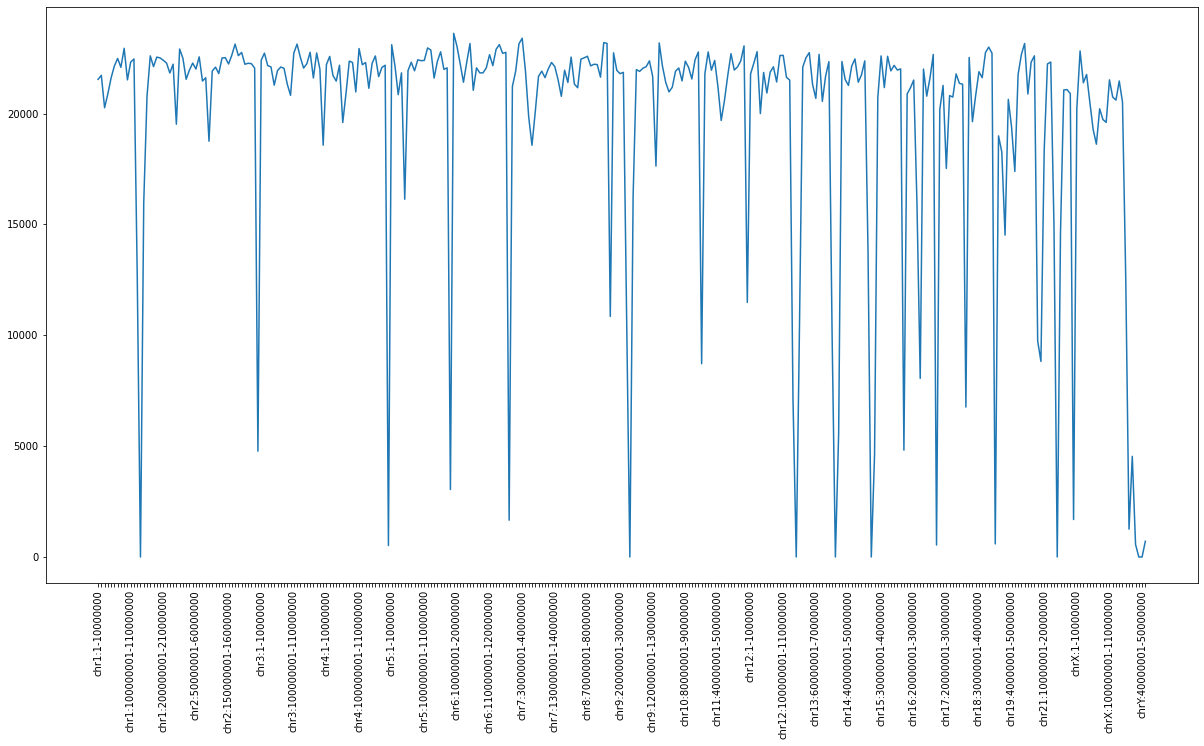

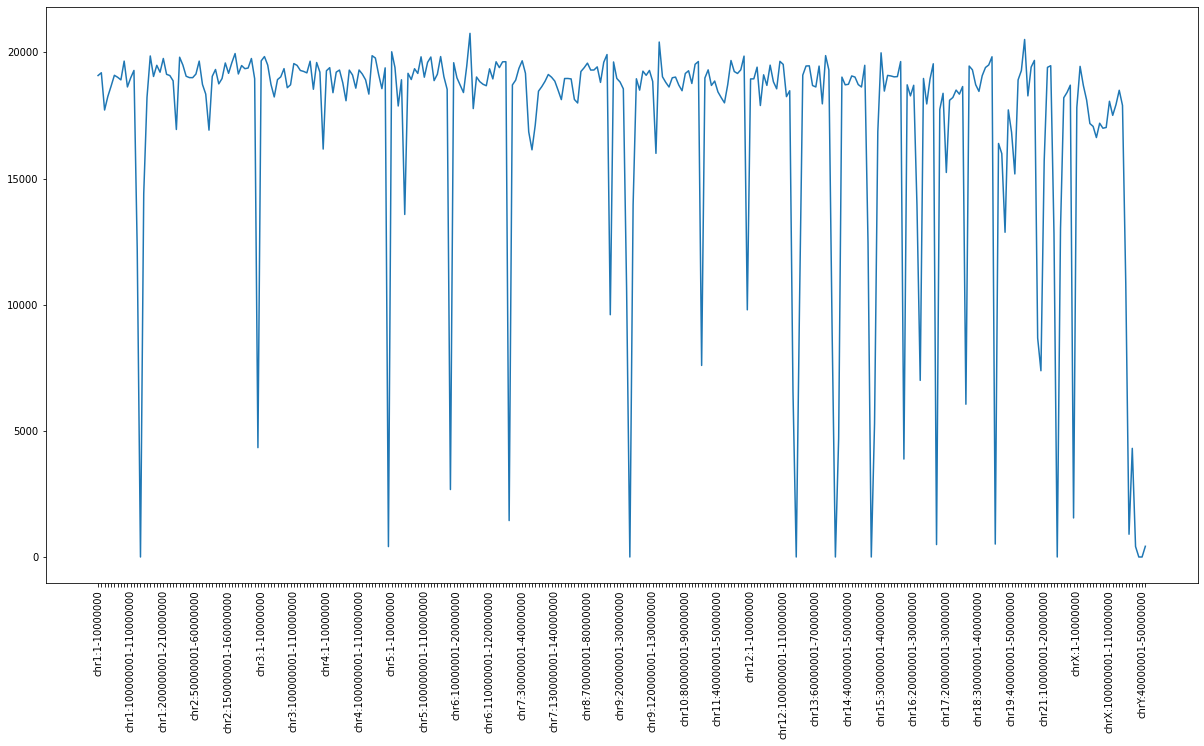

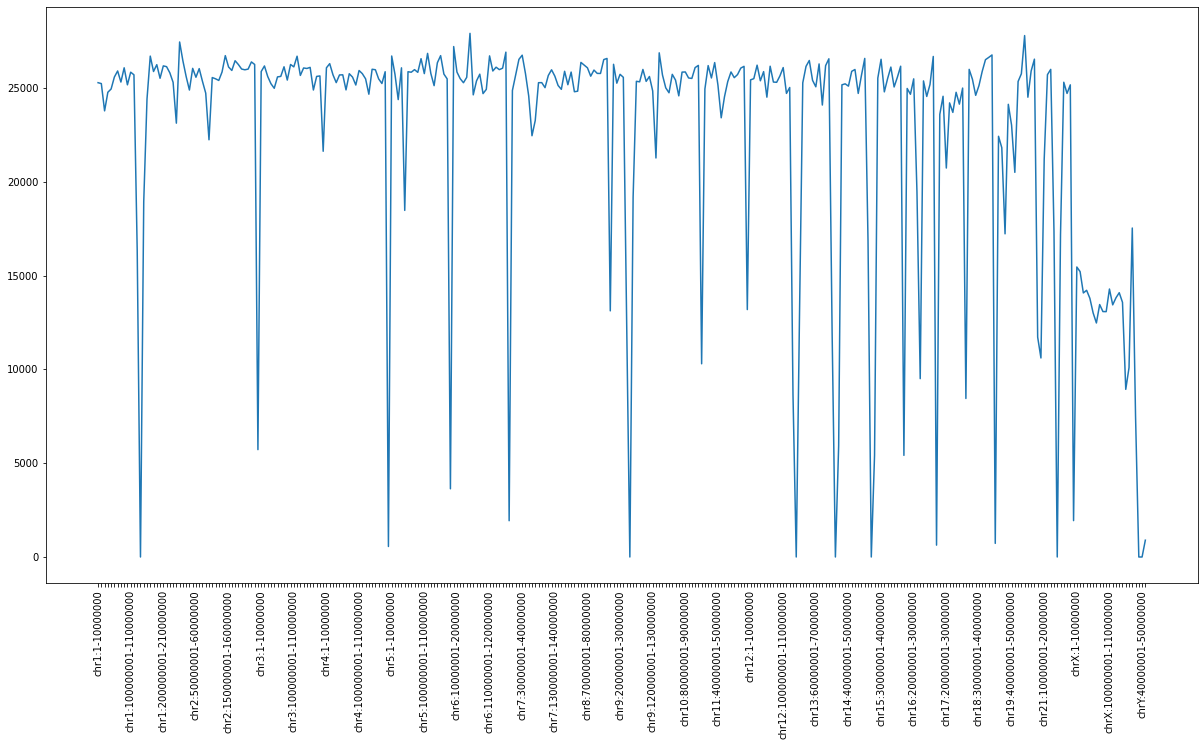

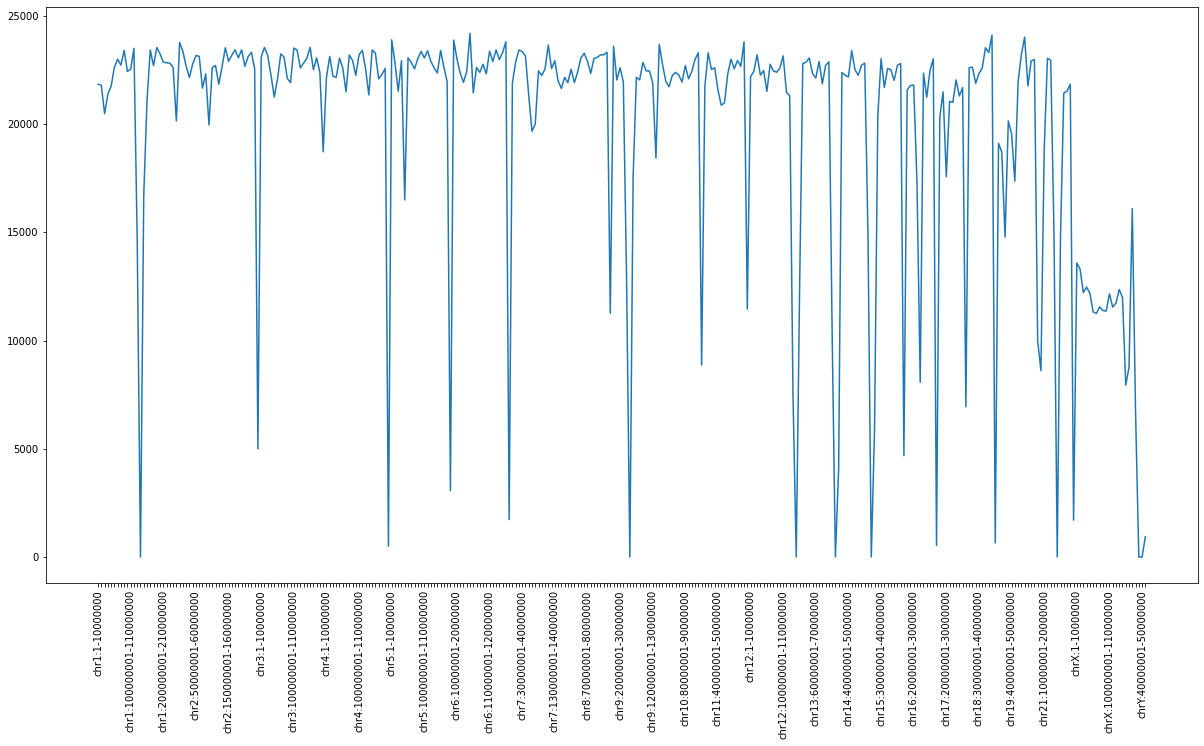

In [9]:
for file in fam2_files:
    fig= plt.figure(figsize=(20,10))
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    plt.plot(fam2_unmapped_dict[file])

    every_nth = 10
    plt.xticks(range(len(fam2_unmapped_dict[file])), fam2_ref, size='medium', rotation='vertical')
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)

### Primary reads only (excluding supplementary/secondary/duplicate reads)

In [5]:
# family 2 filtered bam files
fam2_folders = [x[0] for x in os.walk(os.path.join(directory, 'fam2'))]
fam2_files = []
for folder in fam2_folders:
    if not folder == os.path.join(directory, 'fam2'):
        fam2_files.extend(glob.glob(os.path.join(folder, '*.primary.bam')))
fam2_files

['/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam2/02C10543/02C10543.final.filtered.primary.bam',
 '/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam2/02C10540/02C10540.final.filtered.primary.bam',
 '/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam2/02C10541/02C10541.final.filtered.primary.bam',
 '/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam2/02C10542/02C10542.final.filtered.primary.bam']

In [7]:
print('Processing file ' + fam2_files[1])
fam2_ref, unmapped_r2, unmapped_r1 = count_unmapped_reads(fam2_files[1], chromosomal=False)

Processing file /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam2/02C10540/02C10540.final.filtered.primary.bam
Finished counting unmapped reads for /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam2/02C10540/02C10540.final.filtered.primary.bam


## Heatmap of improperly paired reads

# Family 3 (03C-)

## Unmapped reads plot

In [2]:
fam3_files = glob.glob(os.path.join(directory, 'fam3', '*', '*primary.bam'))
for file in fam3_files:
    print(file)

/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam3/03C16794/03C16794.final.primary.bam
/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam3/03C16797/03C16797.final.primary.bam
/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam3/03C16798/03C16798.final.primary.bam
/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam3/03C16796/03C16796.final.primary.bam
/scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam3/03C16795/03C16795.final.primary.bam


In [ ]:
%%time

# use dictionary to store unmapped read counts for each alignment file
fam3_unmapped_dict = dict()

print('Start counting unmapped reads for {} alignment files...'.format(len(fam3_files)))
for file in fam3_files:
    print('Processing file ' + file)
    fam3_ref, unmapped_r2, unmapped_r1 = count_unmapped_reads(file)
    unmapped_all = []
    for i, j in zip(unmapped_r1, unmapped_r2):
        unmapped_all.append(i+j)
    fam3_unmapped_dict[file] = unmapped_all.copy()

Start counting unmapped reads for 5 alignment files...
Processing file /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam3/03C16794/03C16794.final.primary.bam
Finished counting unmapped reads for /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam3/03C16794/03C16794.final.primary.bam
Processing file /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam3/03C16797/03C16797.final.primary.bam
Finished counting unmapped reads for /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam3/03C16797/03C16797.final.primary.bam
Processing file /scratch/groups/dpwall/personal/chloehe/unmapped_reads/bam/fam3/03C16798/03C16798.final.primary.bam


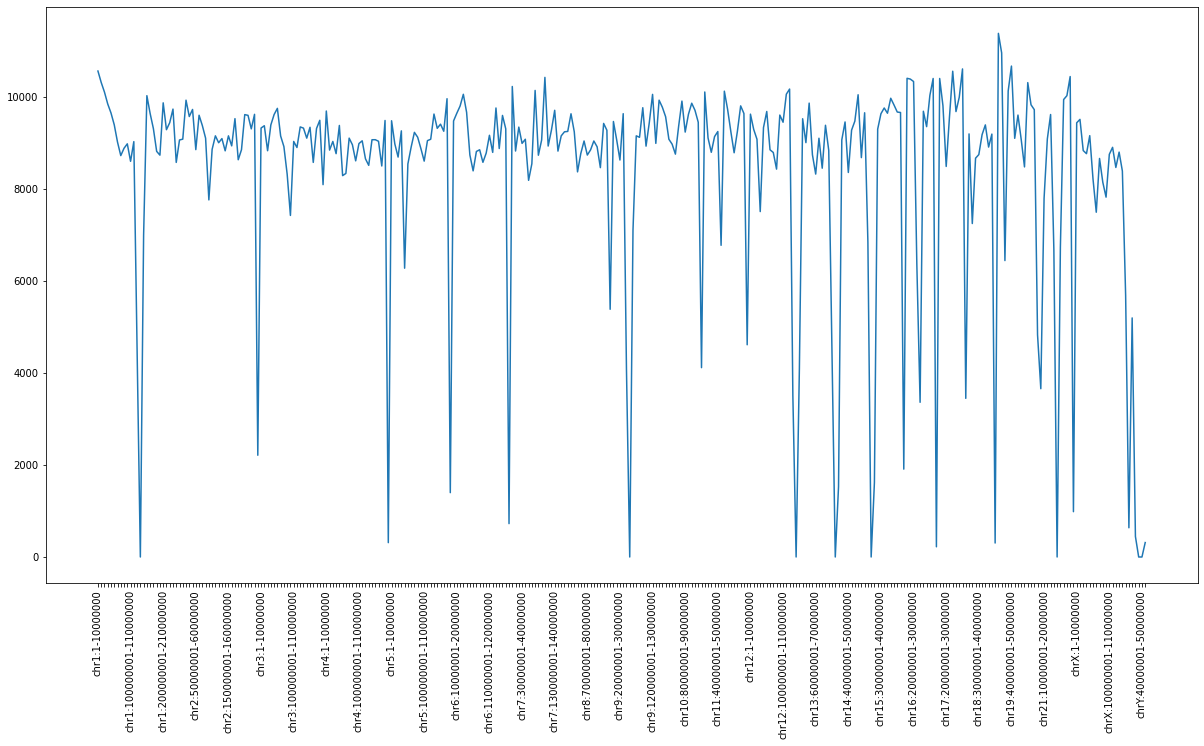

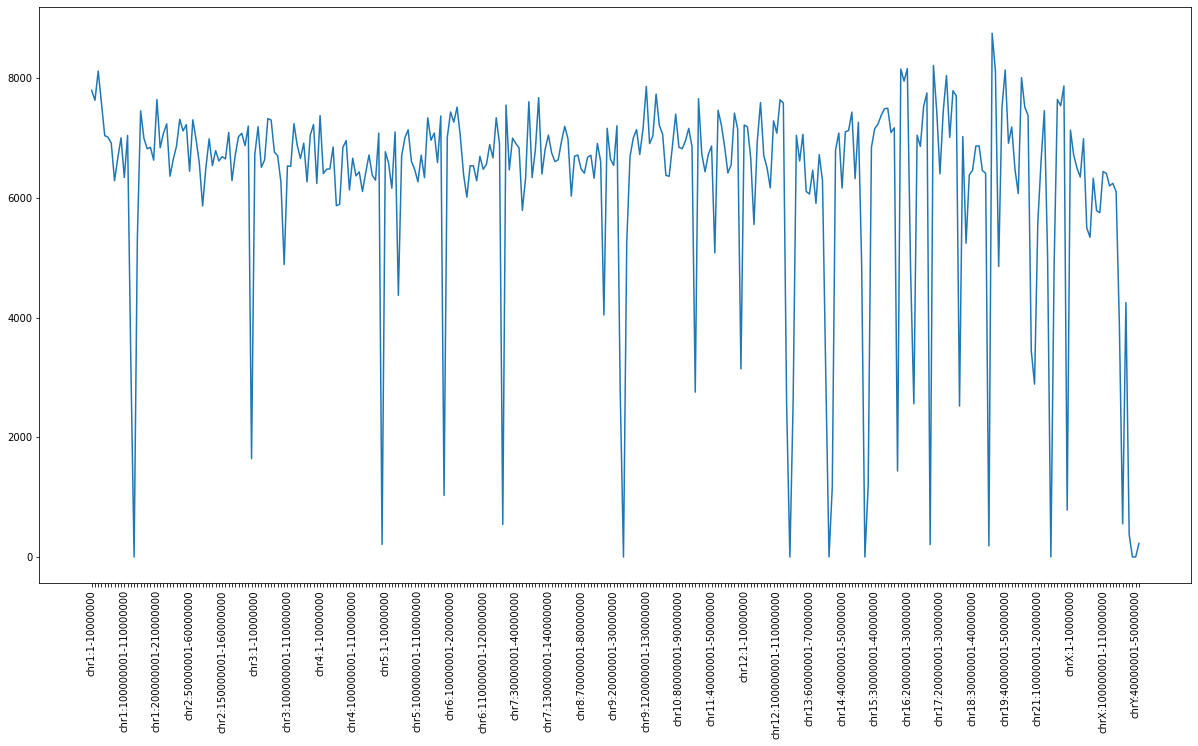

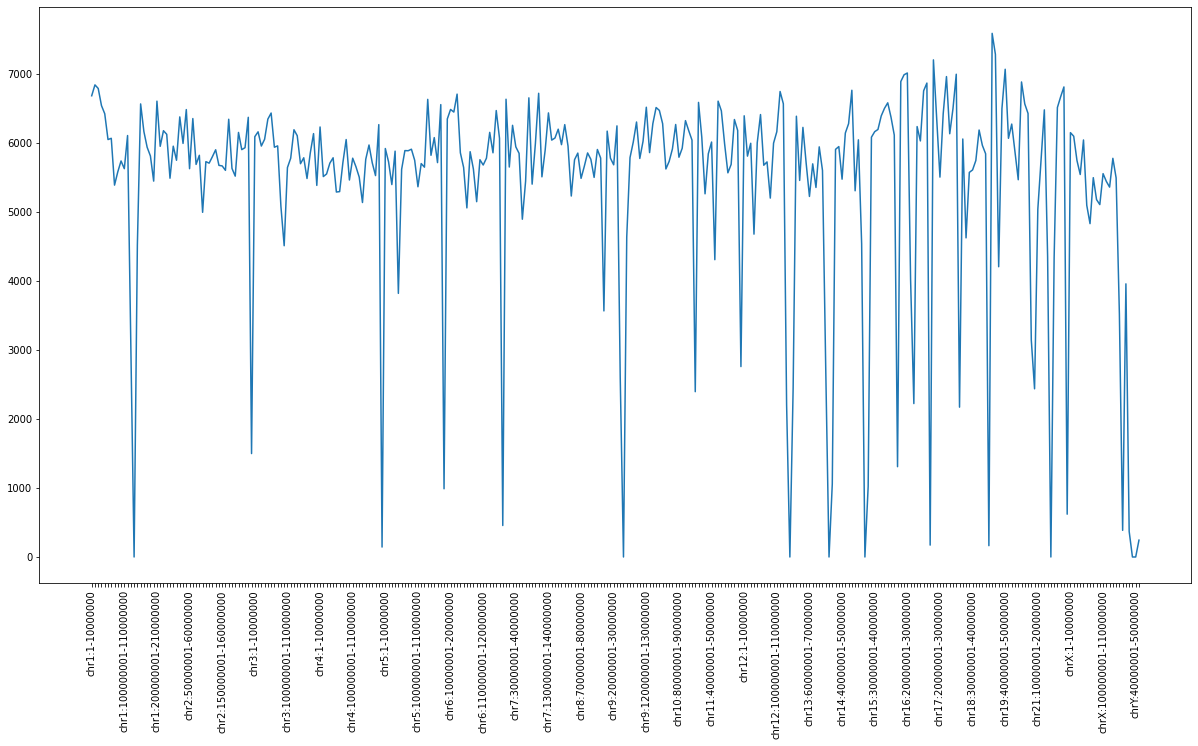

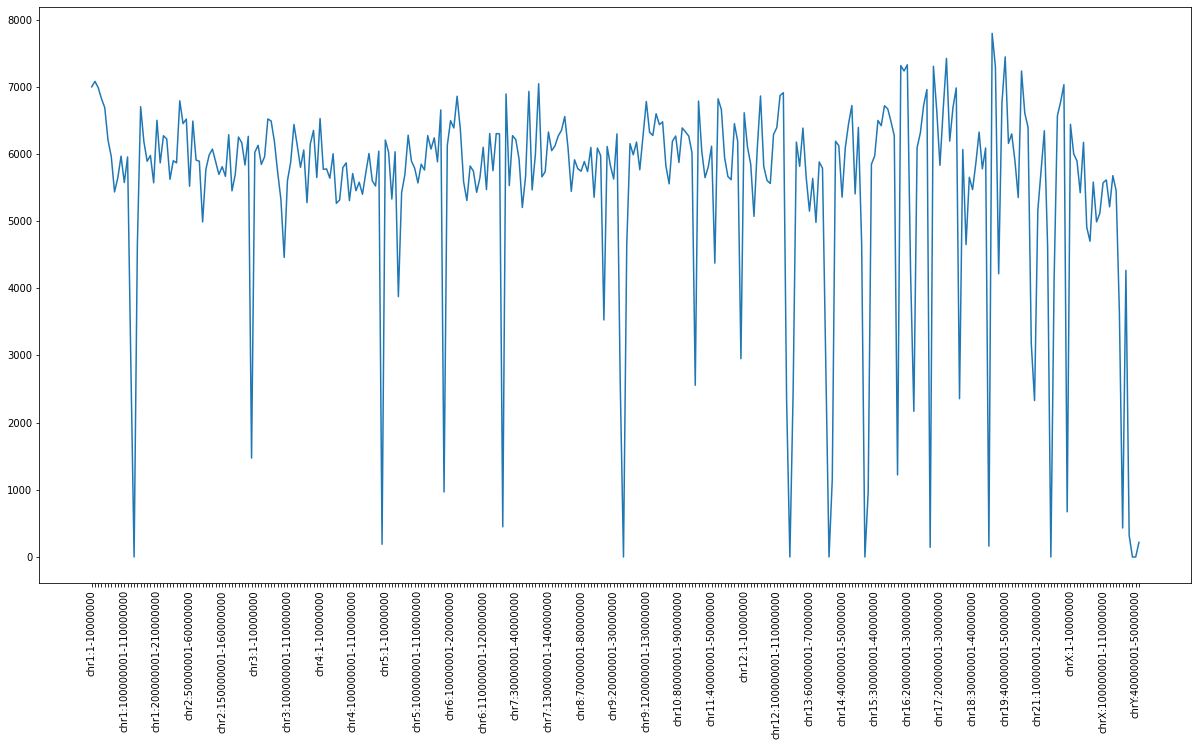

In [9]:
for file in fam3_files[:4]:
    fig= plt.figure(figsize=(20,10))
    ax = fig.add_axes([0.1,0.1,0.8,0.8])
    plt.plot(fam3_unmapped_dict[file])

    every_nth = 10
    plt.xticks(range(len(fam3_unmapped_dict[file])), fam3_ref, size='medium', rotation='vertical')
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)

In [ ]:
def count_unmapped_reads(filepath, window=10000000, chromosomal=True):
    
    directory, filename = os.path.split(filepath)
    
    if 'bam' in filename:
        suffix = '.bai'
        readmode = 'rb'
    elif 'cram' in filename:
        suffix = '.crai'
        readmode = 'rc'
    else:
        print('File type not supported')
        exit()
        
    # samtools index if index file not found
    if not os.path.isfile(os.path.join(directory, filename+suffix)):
        pysam.samtools.index(filepath)
        
    samfile = pysam.AlignmentFile(filepath, readmode)
    
    ref = []
    all_unmapped_mate_counts, all_unmapped_self_counts = [], []
    
    # default: retrieve only chromosomal reads
    if chromosomal:
        num_ref = 24
    else:
        num_ref = len(samfile.references)
        
    # for each window size of base pairs in samfile references (@SQ)
    for i in range(num_ref):
        refname = samfile.references[i]
        seqlen = samfile.lengths[i]
        for j in range(1, seqlen, window):
            stop = j+window-1 if j+window-1 < samfile.lengths[i] else samfile.lengths[i]
            unmapped_mate = 0
            unmapped_self = 0
            
            if not re.match('chr', refname):
                ref.append('chr' + refname + ':' + str(j) + '-' + str(stop))
            else:
                ref.append(refname + ':' + str(j) + '-' + str(stop))
                
            # count unmapped reads
            for read in samfile.fetch(refname, j, stop):
                if not read.is_duplicate and not read.is_secondary and not read.is_supplementary:
                    
                    if read.mate_is_unmapped and not read.is_unmapped:
                        unmapped_mate += 1
                    if read.is_unmapped and not read.mate_is_unmapped:
                        unmapped_self += 1
            all_unmapped_mate_counts.append(unmapped_mate)
            all_unmapped_self_counts.append(unmapped_self)

    samfile.close()
    print('Finished counting unmapped reads for ' + filepath)
    return ref, all_unmapped_mate_counts, all_unmapped_self_counts